In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cx_Oracle
%matplotlib inline

In [2]:
conn = cx_Oracle.connect('js_dev', '123456', 'wind')

In [118]:
query = 'select t.trade_dt, t.s_dq_adjclose \
        from wind.AShareEODPrices t \
        where t.s_info_windcode = \'600315.SH\''

In [119]:
df = pd.read_sql_query(query, con=conn)

In [120]:
df = df.set_index('TRADE_DT')

In [121]:
df.index = pd.to_datetime(df.index)

In [122]:
df = df.sort_index()

In [123]:
df.head()

,S_DQ_ADJCLOSE
TRADE_DT,
2001-03-15,17.00
2001-03-16,16.58
2001-03-19,16.34
2001-03-20,16.46
2001-03-21,16.47


In [124]:
df['Max'] = df['S_DQ_ADJCLOSE'].rolling(243*5, min_periods=1).max()

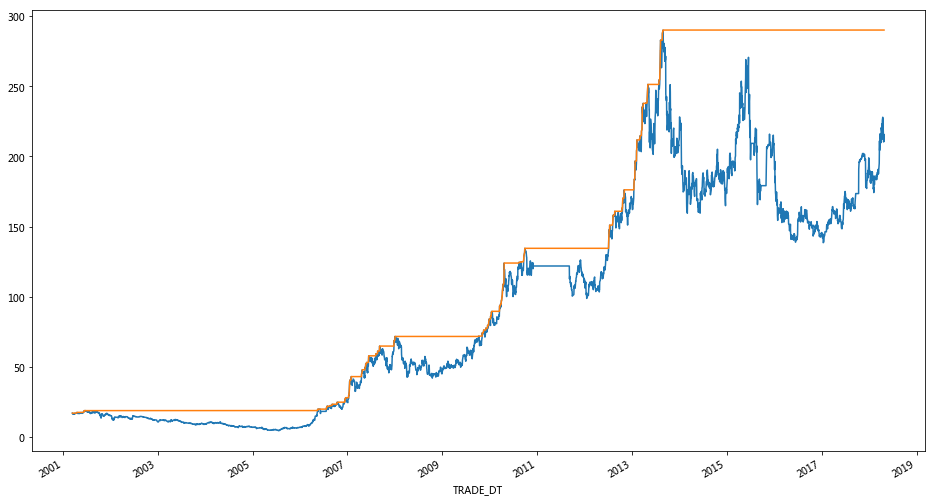

In [125]:
df['S_DQ_ADJCLOSE'].plot(figsize=(16, 9))
df['Max'].plot(figsize=(16, 9))

In [126]:
df['Max Sum'] = (df['Max'] == df['S_DQ_ADJCLOSE']).rolling(window=20).sum()

In [127]:
max_sum = df[df['Max Sum'] != 0]['Max Sum']

<BarContainer object of 756 artists>

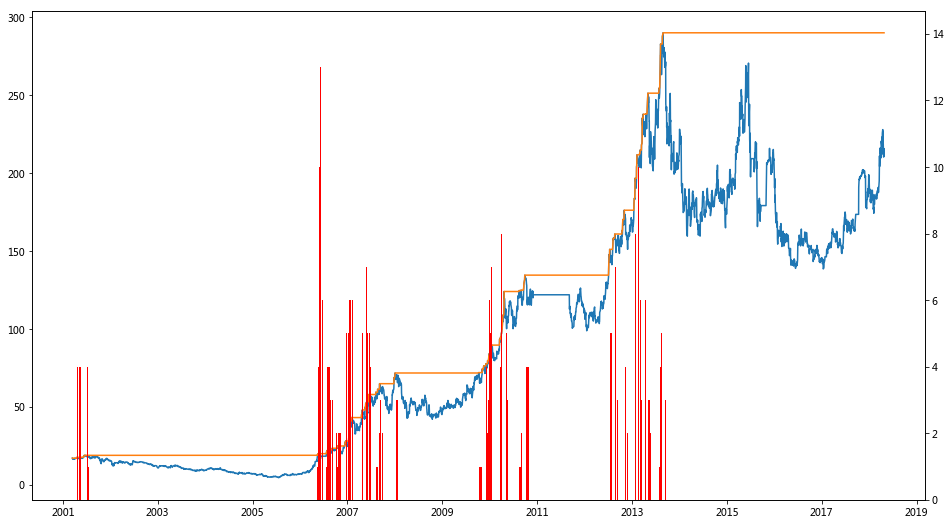

In [128]:
fig, ax1 = plt.subplots(figsize=(16, 9))
ax1.plot(df['S_DQ_ADJCLOSE'])
ax1.plot(df['Max'])
ax2 = ax1.twinx()
ax2.bar(max_sum.index, max_sum.values, color='red')